In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('delivery_time.csv')

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
##Here Responser : Delivery Time and Predictor : Sorting Time
## x= sorting Time and y = Delivery Time
## EDA 


In [4]:
##data.info()
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [51]:
##data.rename({'Delivery Time':'Dtime','Sorting Time':'STime'},axis=1)
##data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

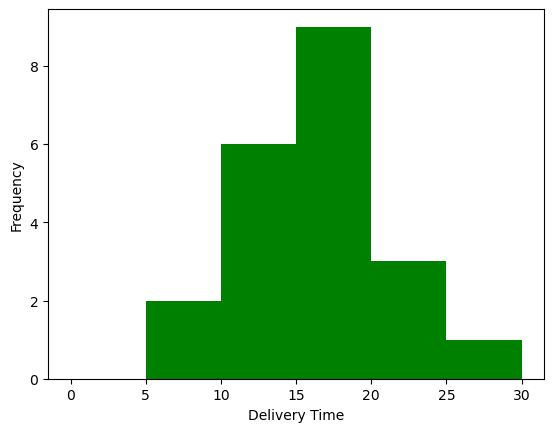

In [7]:
## creating histogram for delivery time column
##
plt.hist(data['Delivery Time'],bins=[0,5,10,15,20,25,30],color='green')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

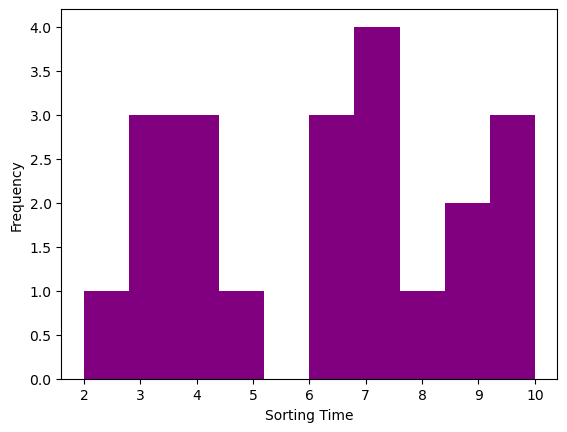

In [8]:
## CReating histogram for Sorting Time Column
plt.hist(data.iloc[:,1],bins=10,color='purple')
plt.xlabel('Sorting Time')
plt.ylabel('Frequency')
plt.show()

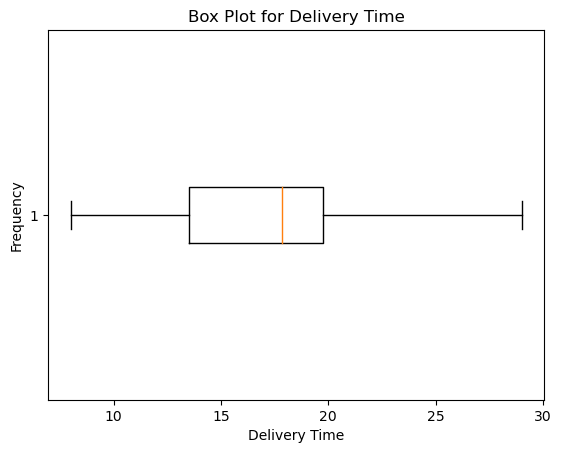

In [53]:
## Creating Box Plot for delivery Time Column
plt.boxplot(data.iloc[:,0],vert = False)
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.title('Box Plot for Delivery Time')
plt.show()

Text(0.5, 1.0, 'Box Plot for Sorting Time Column')

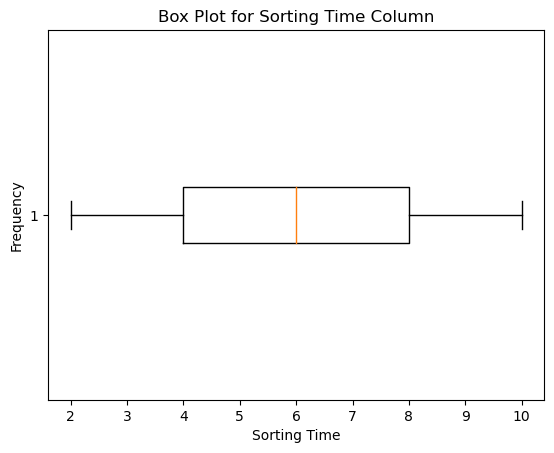

In [9]:
## Box plot for Sorting Time column
plt.boxplot(data['Sorting Time'],vert = False)
plt.xlabel('Sorting Time')
plt.ylabel('Frequency')
plt.title('Box Plot for Sorting Time Column')

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

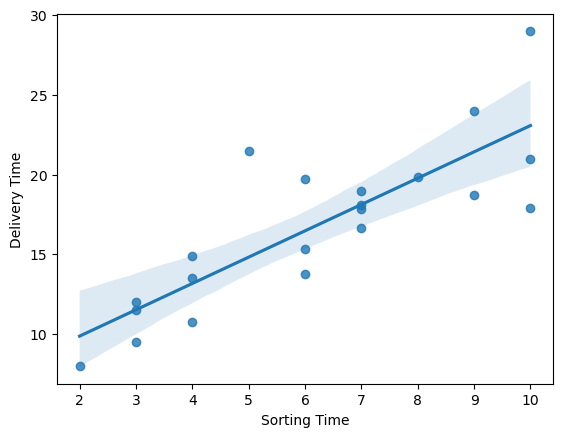

In [10]:
## creating reg plot
import seaborn as sns
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

In [11]:
##First we need to find if there is any correlation between X and Y or not

data.corr()

## from the below correlation matrix we can find that both variables have correlation and value of r=0.82 
## which means they are strong positive correlation

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'Scatter Plot')

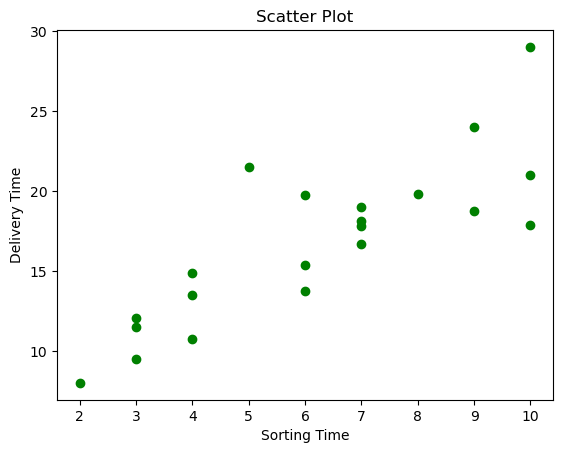

In [12]:
## Plot a scatter Plot for the two variables

plt.scatter(data['Sorting Time'],data['Delivery Time'],c='green')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot')

## from the below plot we can see that both the variables have very strong linear relationship.

In [13]:
import statsmodels.formula.api as smf
regmodel1 = smf.ols("data['Delivery Time']~data['Sorting Time']",data=data).fit()
regmodel1

In [14]:
regmodel1.summary()

## R Square = 68% which is low. So we shall try other model

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data['Delivery Time']   R-squared:                       0.682
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     40.80
Date:                   Mon, 08 May 2023   Prob (F-statistic):           3.98e-06
Time:                           15:51:35   Log-Likelihood:                -51.357
No. Observations:                     21   AIC:                             106.7
Df Residuals:                         19   BIC:                             108.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5827      1.722      3.823      0.001       2.979      10.186
data['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
regmodel1.params

Intercept               6.582734
data['Sorting Time']    1.649020
dtype: float64

In [16]:
regmodel1.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [17]:
predict_regmodel1 = regmodel1.predict(data['Sorting Time'])

In [18]:
predict_regmodel1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [19]:
rmse_regmodel1 = np.sqrt(np.mean((np.array(data['Delivery Time'])-np.array(predict_regmodel1))**2))

In [20]:
rmse_regmodel1

2.7916503270617654

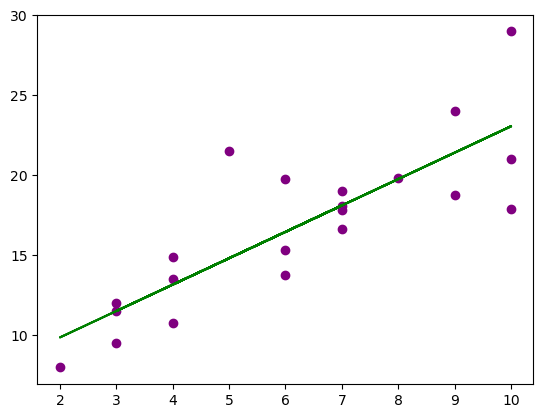

In [21]:
plt.scatter(data['Sorting Time'],data['Delivery Time'],c='Purple')
##sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'],color='Red')
plt.plot(data['Sorting Time'],np.array(predict_regmodel1),c='green')
plt.show()


In [22]:
## Now lets try with log transformation of model as R2 is less than 75%
log_regmodel=smf.ols("data['Delivery Time']~np.log(data['Sorting Time'])",data=data).fit()
log_regmodel.summary()

## for this model our R2 value is 69%

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data['Delivery Time']   R-squared:                       0.695
Model:                               OLS   Adj. R-squared:                  0.679
Method:                    Least Squares   F-statistic:                     43.39
Date:                   Mon, 08 May 2023   Prob (F-statistic):           2.64e-06
Time:                           15:52:00   Log-Likelihood:                -50.912
No. Observations:                     21   AIC:                             105.8
Df Residuals:                         19   BIC:                             107.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(data['Sorting Time'])     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
log_regmodel.params

Intercept                       1.159684
np.log(data['Sorting Time'])    9.043413
dtype: float64

In [31]:
##log_regmodel_predict = log_regmodel.predict(data['Sorting Time'])
log_regmodel_predict = log_regmodel.predict(pd.DataFrame(data['Sorting Time']))

In [32]:
log_regmodel_predict

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [33]:
log_regmodel.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [34]:
log_regmodel_rmse = np.sqrt(np.mean((np.array(data['Delivery Time'])-np.array(log_regmodel_predict))**2))

In [35]:
log_regmodel_rmse

2.733171476682066

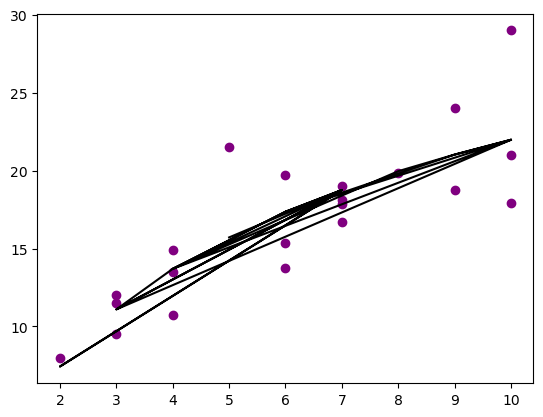

In [48]:
## Scatter Plot for Logarithemic Model
plt.scatter(x=data['Sorting Time'],y=data['Delivery Time'],c='purple')
plt.plot(data['Sorting Time'],log_regmodel_predict,color='black');
##plt.plot(data['Sorting Time'],log_regmodel_predict,c='red')
plt.show()

In [39]:
## Exponential transfer
exp_regmodel=smf.ols("np.log(data['Delivery Time'])~data['Sorting Time']",data=data).fit()
exp_regmodel

In [40]:
exp_regmodel.summary()
##Rsquare is 71% for Exponential Model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(data['Delivery Time'])   R-squared:                       0.711
Model:                                       OLS   Adj. R-squared:                  0.696
Method:                            Least Squares   F-statistic:                     46.73
Date:                           Mon, 08 May 2023   Prob (F-statistic):           1.59e-06
Time:                                   15:53:57   Log-Likelihood:                 7.7920
No. Observations:                             21   AIC:                            -11.58
Df Residuals:                                 19   BIC:                            -9.495
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1214      0.103     20.601      0.000       1.906       2.337
data['Sorting Time']     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
exp_regmodel_predict=np.exp(exp_regmodel.predict(data['Sorting Time']))
exp_regmodel_predict

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [85]:
exp_regmodel_resid=exp_regmodel.resid
exp_regmodel_resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [86]:
exp_regmodel_rmse=np.sqrt(np.mean((np.array(data['Delivery Time'])-np.array(exp_regmodel_predict))**2))

In [87]:
exp_regmodel_rmse

2.940250323056201

Text(0.5, 1.0, ' Plot for Exponential Transformation Values')

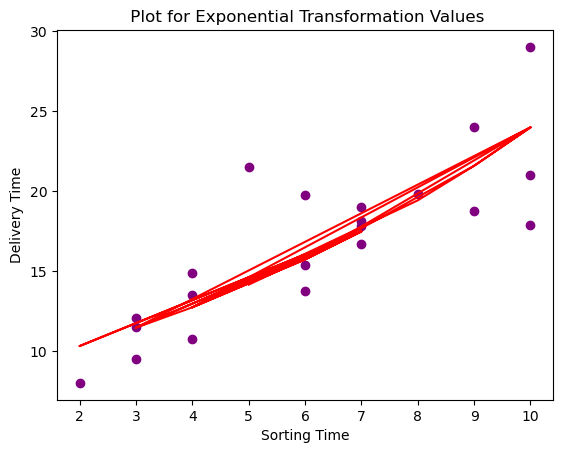

In [88]:
plt.scatter(data['Sorting Time'],data['Delivery Time'],c='Purple')
plt.plot(data['Sorting Time'],exp_regmodel_predict,c='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title(" Plot for Exponential Transformation Values")

In [52]:
##Quadratic Transformation y= b0+b1(x)+b2(x**2)
data['Sorting Time Square']=data['Sorting Time']*data['Sorting Time']


In [53]:
data

,Delivery Time,Sorting Time,Sorting Time Square
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [63]:
quad_regmodel=smf.ols("np.log(data['Delivery Time'])~data['Sorting Time']+data['Sorting Time Square']",data=data).fit()
quad_regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(data['Delivery Time'])   R-squared:                       0.765
Model:                                       OLS   Adj. R-squared:                  0.739
Method:                            Least Squares   F-statistic:                     29.28
Date:                           Mon, 08 May 2023   Prob (F-statistic):           2.20e-06
Time:                                   16:06:02   Log-Likelihood:                 9.9597
No. Observations:                             21   AIC:                            -13.92
Df Residuals:                                 18   BIC:                            -10.79
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6997      0.228      7.441      0.000       1.220       2.180
data['Sorting Time']            0.2659      0.080      3.315      0.004       0.097       0.434
data['Sorting Time Square']    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
quad_regmodel.aic

-13.919465587090826

In [68]:
##Rsquare value for quadratic model
## We got 76% 
quad_regmodel.rsquared

0.764866634295373

In [70]:
quad_regmodel_predict=quad_regmodel.predict(data)
quad_regmodel_predict

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [74]:
quad_regmodel_exp_predict=np.exp(quad_regmodel_predict)
quad_regmodel_exp_predict

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [82]:
data['Delivery Time']

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [81]:
quad_regmodel_resid=quad_regmodel.resid
quad_regmodel_resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [83]:
quad_regmodel_rmse=np.sqrt(np.mean((np.array(data['Delivery Time'])-np.array(quad_regmodel_exp_predict))**2))
quad_regmodel_rmse

2.799041988740925

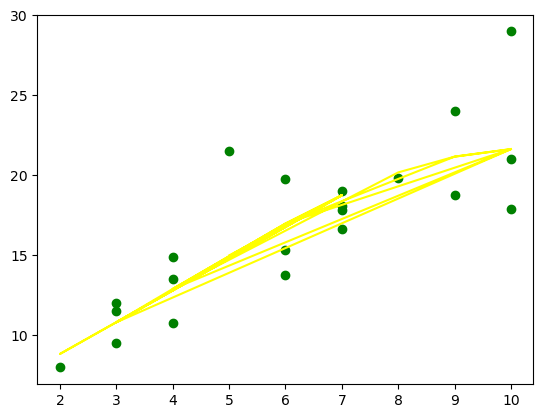

In [94]:
plt.scatter(x=data['Sorting Time'],y=data['Delivery Time'],c='green')
plt.plot(data['Sorting Time'],quad_regmodel_exp_predict,c='yellow')


In [105]:
resulf_df=pd.DataFrame({
           'Model':pd.Series(['Linear','Exponential','Log','Quadratic']),
           'R Square':pd.Series([regmodel1.rsquared,exp_regmodel.rsquared,log_regmodel.rsquared,quad_regmodel.rsquared]),
           'RMSE':pd.Series([rmse_regmodel1,exp_regmodel_rmse,log_regmodel_rmse,quad_regmodel_rmse]),
           'AIC':pd.Series([regmodel1.aic,exp_regmodel.aic,log_regmodel.aic,quad_regmodel.aic]),
           'BIC':pd.Series([regmodel1.bic,exp_regmodel.bic,log_regmodel.bic,quad_regmodel.bic])
                        })

In [106]:
resulf_df

,Model,R Square,RMSE,AIC,BIC
0,Linear,0.682271,2.791650,106.714002,108.803047
1,Exponential,0.710948,2.940250,-11.583930,-9.494885
2,Log,0.695443,2.733171,105.824850,107.913894
3,Quadratic,0.764867,2.799042,-13.919466,-10.785898


In [ ]:
## We select Quadratic model as r square is 76%